### Week 3: Unsupervised Learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

#### Q1

C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


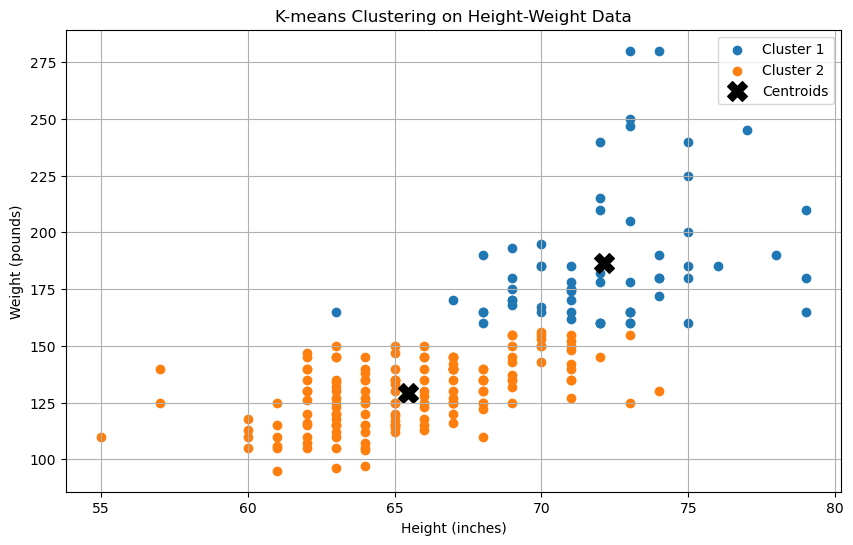

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load dataset
# Assuming the data has columns: [gender/class, height, weight]
heightWeightData = pd.read_csv('./heightWeightData.csv', header=None).to_numpy()

# Extract inputs and n_clusters
height_weight = heightWeightData[:, 1:3]  # Columns 1 and 2 (height and weight)
n_clusters = 2  # Setting the number of clusters based on the apparent gender binary in the data

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(height_weight)
centers = kmeans.cluster_centers_

# Plot the data
plt.figure(figsize=(10, 6))

# Plot data points color-coded by class label
for i in range(n_clusters):
    cluster_points = height_weight[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Centroids')

# Add labels and legend
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('K-means Clustering on Height-Weight Data')
plt.legend()
plt.grid(True)
plt.show()

#### Q2

In [11]:
def pca(X, n_components):
    """
    Perform PCA on the dataset X and return the top n_components principal components.
    Parameters:
    X (numpy.ndarray): The data matrix (each row is a sample, each column is a feature).
    n_components (int): The number of principal components to return.
    Returns:
    X_pca (numpy.ndarray): The transformed data matrix with the top n_components principal components.
    selected_eigenvectors (numpy.ndarray): The principal components (eigenvectors).
    sorted_eigenvalues (numpy.ndarray): The explained variance (eigenvalues).
    """
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    
    # Standardize the data (zero mean, unit variance)
    X_std = StandardScaler().fit_transform(X)
    
    # Calculate the covariance matrix
    # rowvar=False indicates that the variables are in columns, not rows
    # This is because each row in X is a sample and each column is a feature
    cov_matrix = np.cov(X_std, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    # argsort returns indices that will sort the array
    # [::-1] reverses the order to get descending order
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Get sorted eigenvalues
    sorted_eigenvalues = np.array([eigen_pairs[i][0] for i in range(len(eigenvalues))])
    
    # Select the top n_components eigenvectors
    selected_eigenvectors = np.array([eigen_pairs[i][1] for i in range(n_components)]).T
    
    # Project the data onto the principal components
    X_pca = np.dot(X_std, selected_eigenvectors)
    
    return X_pca, selected_eigenvectors, sorted_eigenvalues

#### Q3

In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target.astype(int)

# Perform PCA and get the top 2 principal components
# First, standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Now X_pca contains the data projected onto the top 2 principal components
# pca.components_ contains the principal components (eigenvectors)
# pca.explained_variance_ contains the eigenvalues

# Optional: Print the shape of the transformed data
print(f"Original data shape: {X.shape}")
print(f"PCA transformed data shape: {X_pca.shape}")

Original data shape: (70000, 784)
PCA transformed data shape: (70000, 2)


#### Q4

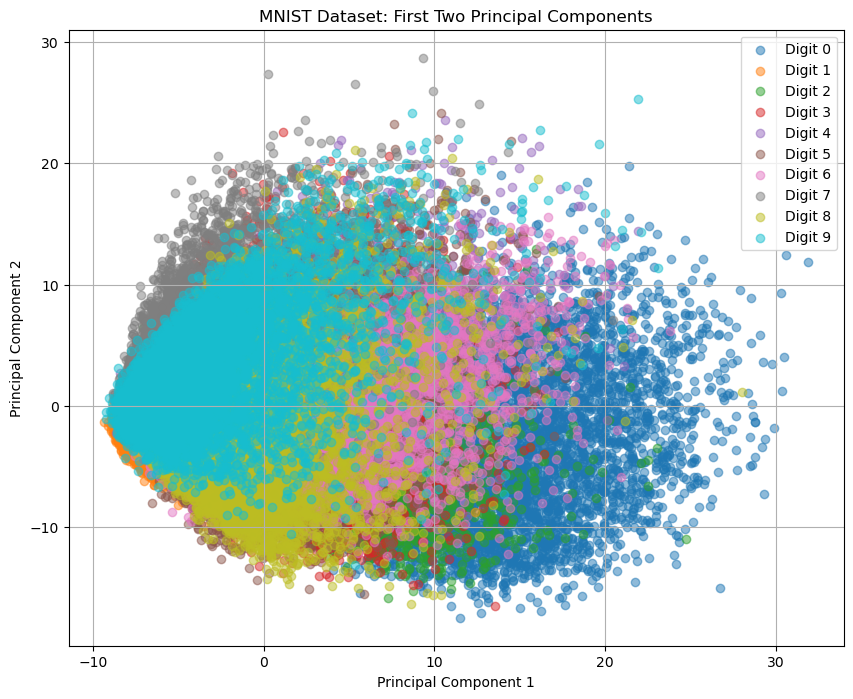

In [19]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 8))

# Create a scatter plot for each digit class
for digit in range(10):
    # Filter points belonging to the current digit
    mask = y == digit
    # Plot these points with a distinct color and label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], alpha=0.5, label=f'Digit {digit}')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset: First Two Principal Components')

# Add a legend to identify digit classes
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

#### Q5

In [22]:
# Calculate the percentage of variance explained by the first two principal components
variance_explained_ratio = 100 * sum(pca.explained_variance_ratio_[:2])
print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")

Variance explained by the first two principal components: 9.68%


#### Q6

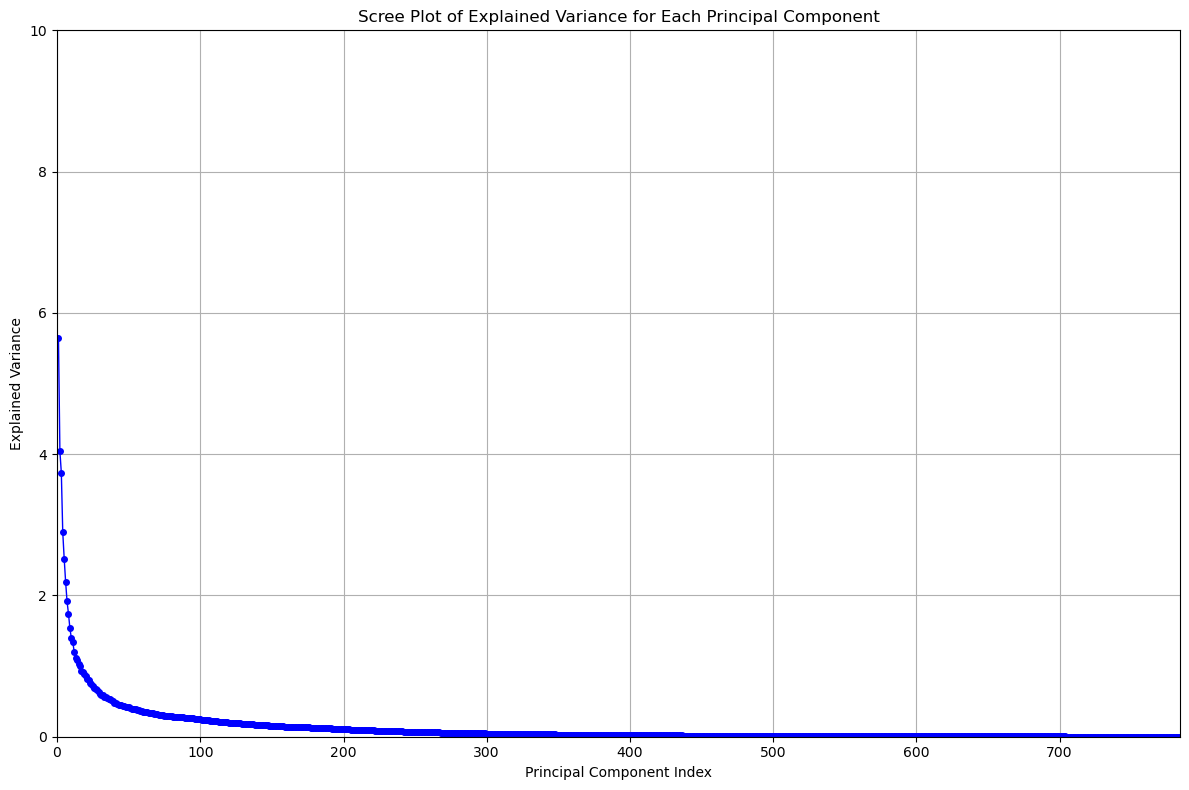

In [31]:
# Create a new PCA with all components
pca_full = PCA()  # No n_components specified means all components are kept
pca_full.fit(X_scaled)

# Plot the Scree plot as a line plot
plt.figure(figsize=(12, 8))

# Plot explained variance for each component
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_ * 100, 
         'o-', markersize=4, linewidth=1, color='blue')

# Format the plot
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance')
plt.title('Scree Plot of Explained Variance for Each Principal Component')
plt.grid(True)
plt.xlim(0, 784)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

#### Q7

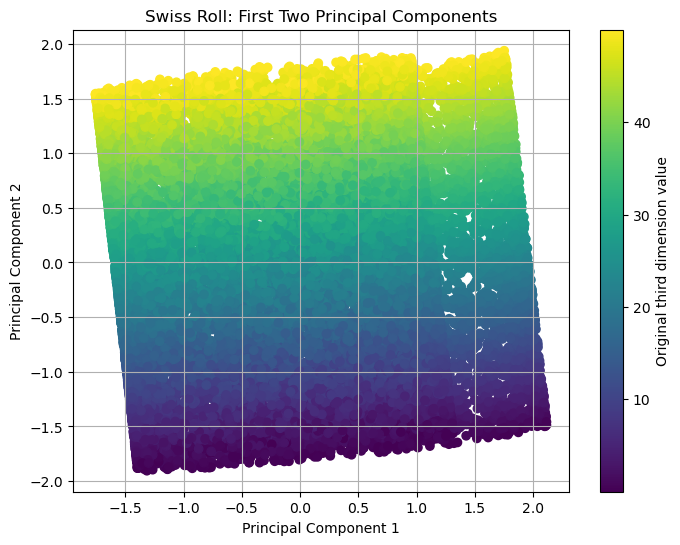

Variance explained by the first two principal components: 68.85%


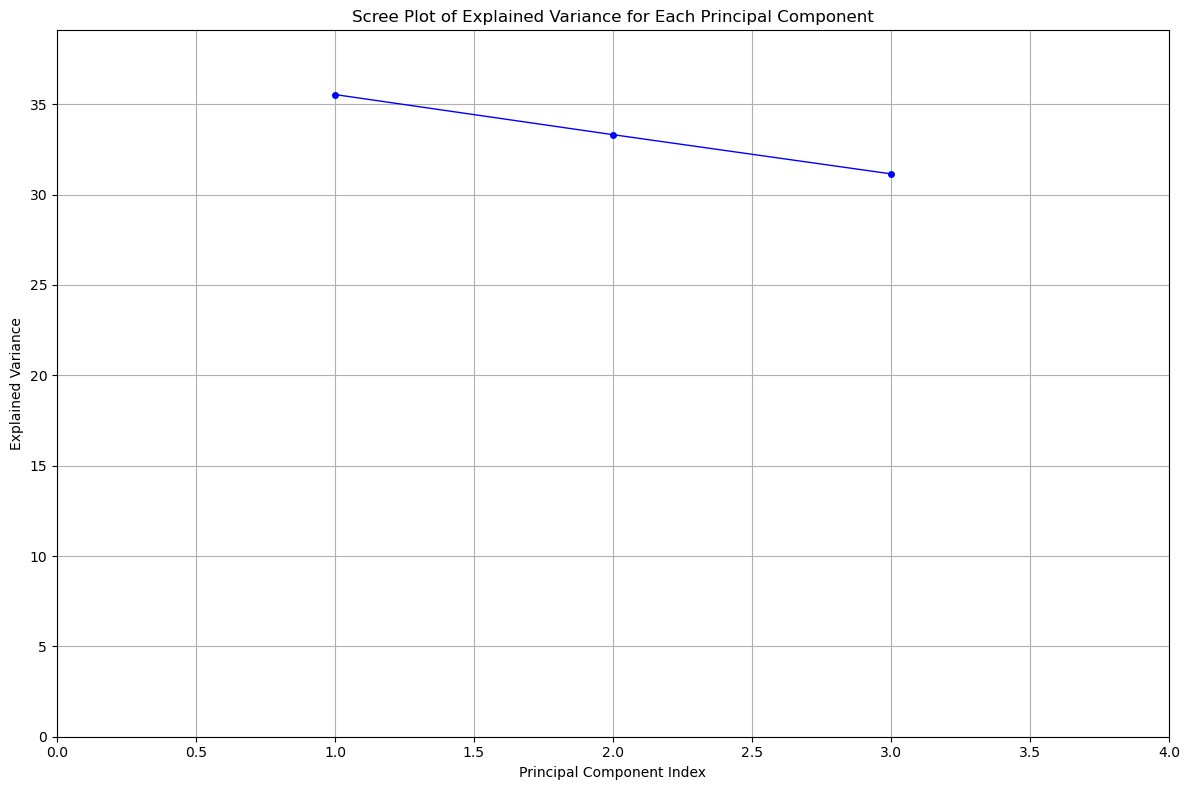

In [36]:
# Load the Swiss roll dataset
swissroll = np.loadtxt('./swissroll.txt')

# Q3: Perform PCA and get the top 2 principal components
# First, standardize the data
scaler = StandardScaler()
swissroll_scaled = scaler.fit_transform(swissroll)

# Apply PCA to get the top 2 principal components
pca = PCA(n_components=2)
swissroll_pca = pca.fit_transform(swissroll_scaled)

# Q4: Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(swissroll_pca[:, 0], swissroll_pca[:, 1], c=swissroll[:, 2], cmap='viridis')
plt.colorbar(label='Original third dimension value')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Swiss Roll: First Two Principal Components')
plt.grid(True)
plt.show()

# Q5: Calculate the percentage of variance explained by the first two principal components
variance_explained_ratio = 100 * sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two principal components: {variance_explained_ratio:.2f}%")

# Q6: Plot the Scree plot like the example shown
# Create a new PCA with all components
pca_full = PCA()
pca_full.fit(swissroll_scaled)

# Plot the Scree plot as a line plot
plt.figure(figsize=(12, 8))

# Plot explained variance for each component
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_ * 100, 
         'o-', markersize=4, linewidth=1, color='blue')

# Format the plot
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance')
plt.title('Scree Plot of Explained Variance for Each Principal Component')
plt.grid(True)
plt.xlim(0, len(pca_full.explained_variance_ratio_) + 1)
plt.ylim(0, max(pca_full.explained_variance_ratio_ * 100) * 1.1)  # Add 10% padding to y-axis

plt.tight_layout()
plt.show()